In [23]:
import numpy as np
import sklearn.datasets as datasets

import matplotlib.pyplot as plt

import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils

import mlgrad.pca as pca
import mlgrad.pca.location_scatter as location_scatter

In [15]:
X, Y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [16]:
print(f"X:{X.shape} Y:{Y.shape}")

X:(70000, 784) Y:(70000,)


In [27]:
I1 = (Y == '1')
X1 = X[I1]
Y1 = X[I1]

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 124. 253. 255.  63.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  96. 244. 251. 253.  62.   0.   0.   0.   0.   0.   0.
   0. 

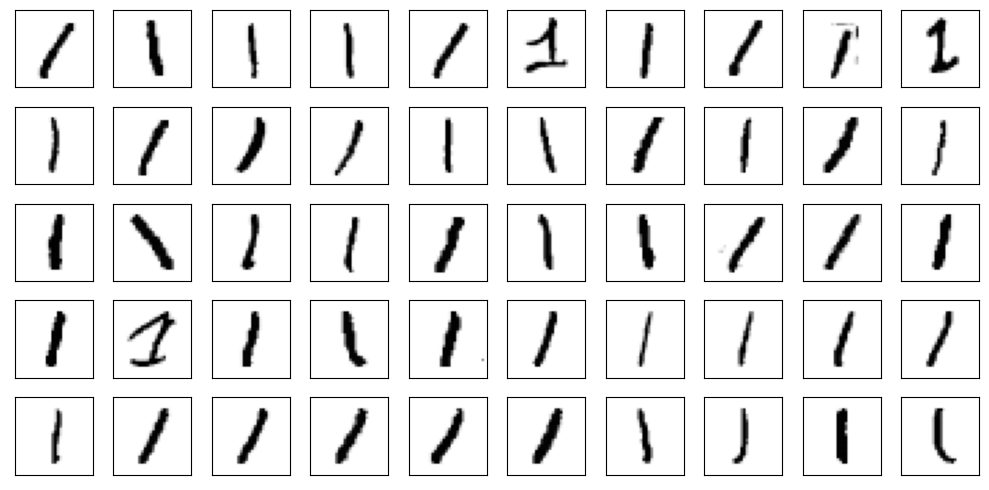

In [18]:
plt.figure(figsize=(10,5))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X1[i].reshape(28,28), cmap=plt.cm.Greys)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()
    

In [26]:
S0 = X1.T @ X1
print(S0)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
S = location_scatter.robust_scatter_matrix(X1, wma)
print(S)

TypeError: robust_scatter_matrix() missing 1 required positional argument: 'maf'

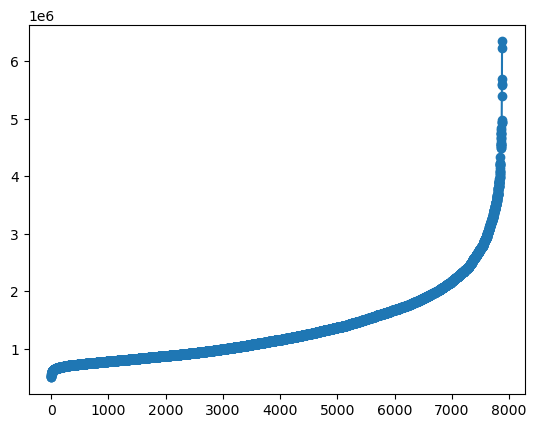

15644698627.735886


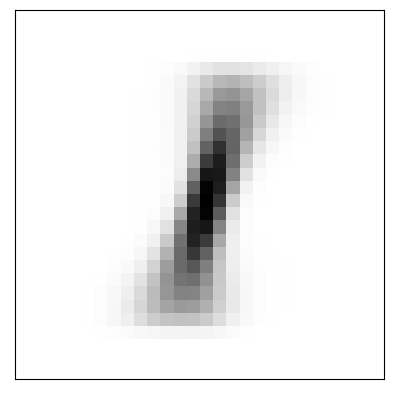

In [21]:
a1_0, L1_0 = pca.find_pc(X1)
plt.plot(sorted(pca.distance_line(X1, a1_0)), marker='o')
plt.show()
print(L1_0)
plt.imshow(a1_0.reshape(28,28), cmap=plt.cm.Greys)
plt.xticks([])
plt.yticks([])
plt.show()

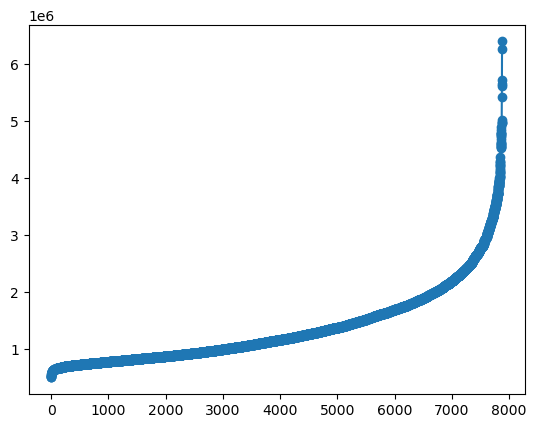

15186105271.969791


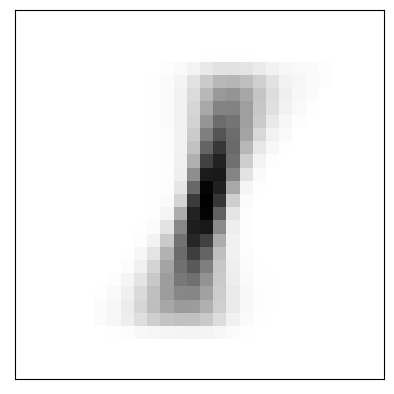

In [22]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.95)
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o')
plt.show()
print(L1)
plt.imshow(a1.reshape(28,28), cmap=plt.cm.Greys)
plt.xticks([])
plt.yticks([])
plt.show()